In [1]:
# CELL 0
# dependencies

%matplotlib notebook

# SQLAlchemy
from sqlalchemy import create_engine

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt
import numpy as np

# load .env 
from dotenv import load_dotenv
#load dotenv()

# os
import os

#password
from config import password1
#import config
#config.password1
#password1

'Wysm99mh11!'

In [2]:
# CELL 1
# import Postgresql into python
# Sourced from https://www.postgresqltutorial.com/postgresql-python/connect/
# the following command lines produced errors
# python setup.py build:  can't open setup.py
# sudo python setup.py install:  command not found

In [3]:
# CELL 2
# Create engine and connection
# Research how to do password
# What syntax to use password


#password = os.environ.get('password')

# password component sourced from https://hackersandslackers.com/connecting-pandas-to-a-sql-database-with-sqlalchemy/
# //username:password@db_host
#engine = create_engine('postgresql://michael.grad@hotmail.com:password@localhost:5432/Pewlett Hackard')
#connection = engine.connect()


In [4]:
# CELL 3
# Query All Records in the the Database
#salary_data_1 = engine.execute("SELECT * salaries")
#salary_data_1

In [5]:
# CELL 3.1
# Create histogram
# sourced from https://mode.com/example-gallery/python_histogram/
#ax = df.hist(column='salary_data_1', by='user_type', bins=25, grid=False, figsize=(8,10), layout=(3,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

In [6]:
# CELL 4
# Attempot 3 to import a db into python
# Sourced from https://stackabuse.com/working-with-postgresql-in-python/
# pip3 install psycopg2:  pip3 not found psycopg2 already installed

# VERIFIED AS WORKING
import psycopg2

con = psycopg2.connect(database="Pewlett Hackard", user="postgres", password=password1, host="127.0.0.1", port="5432")

print("Database opened successfully")

Database opened successfully


In [45]:
#print(password1)

In [8]:
# CELL 5
# Strategy

# analysis 1
# query db pewlet hackard to get just salary and store as a df
# find min and max of salary
# create 10k bins between min and max salary
# plot salary by bin

# analysis 2
# query db pewlet hackard to get salary and title
# join employee, titles, salaries
# save as a dataframe title, salary
# Create a bar chart of average salary by title.

In [9]:
# CELL 6
# QUERY DB PEWLETT HACKARD
# Sourced from https://stackabuse.com/working-with-postgresql-in-python/

#cur = con.cursor()

#Retrieve salary data, set column headers here
#cur.execute("SELECT * FROM salaries")
salary_data = pd.read_sql("SELECT * FROM salaries", con)
#salary_data = cur.fetchall()

In [10]:
# CELL 6.01a
salary_data

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [11]:
# CELL 6.01aa
print("Read salary data successfully")

#con.commit()
#con.close()

# DEBUG!!
# Why no headers???
salary_data = pd.DataFrame(salary_data)
salary_data

salary_data.columns = ["Employee No", "Salary"]

# Find min and max of salary data
# min = 40000, max = 130000
salary_data.describe()

# DEBUG!! no headers in dataframe

Read salary data successfully


,Employee No,Salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


In [12]:
# CELL 7
# Create bins
# Sourced from Activity 4.3.3

# Create the bins in which Data will be held
bins = [40000, 49999, 59999, 69999, 79999, 89999, 99999, 109999, 119999, 129999, 139999]

# Create the names for the five bins
group_names = ["40-49k", "50-59k", "60-69k", "70-79k", "80-89k", "90-99k", "100-109k", "110-119k", "120-129", "130-139k"]

In [13]:
# CELL 8

# DEBUG!! change salary_data["1"] after column headers issue is resolved
# Column "1" is salary
salary_data["Salary Bin"] = pd.cut(salary_data["Salary"], bins, labels=group_names, include_lowest=True)
salary_data

,Employee No,Salary,Salary Bin
0,10001,60117,60-69k
1,10002,65828,60-69k
2,10003,40006,40-49k
3,10004,40054,40-49k
4,10005,78228,70-79k
...,...,...,...
300019,499995,40000,40-49k
300020,499996,58058,50-59k
300021,499997,49597,40-49k
300022,499998,40000,40-49k


In [14]:
# CELL 8.1
# Need to group by salary and get count of each bin???
salary_grouping = salary_data.groupby("Salary Bin").count()
salary_grouping

,Employee No,Salary
Salary Bin,,
40-49k,158465,158465
50-59k,57915,57915
60-69k,41413,41413
70-79k,24814,24814
80-89k,11845,11845
90-99k,4284,4284
100-109k,1069,1069
110-119k,195,195
120-129,24,24


[0 1 2 3 4 5 6 7 8 9]
[158465  57915  41413  24814  11845   4284   1069    195     24      0]


([<matplotlib.axis.XTick at 0x2718a752fc8>,
 <a list of 10 Text xticklabel objects>)

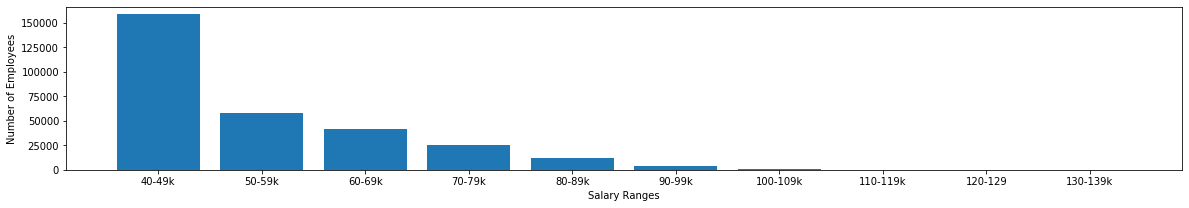

In [15]:
# CELL 9
# Plot salary data as a histogram
# Sourced from activity 5.2.2
# QUESTION:  Is this the right way to show a histogram?
%matplotlib inline

# Set x axis and tick locations
x_axis = np.arange(len(salary_grouping))
print(x_axis)
#x_axis = salary_grouping.index
# tick_locations = [value for value in x_axis]

x_labels = salary_grouping

# labels sourced from https://benalexkeen.com/bar-charts-in-matplotlib/#:~:text=Bar%20charts%20are%20used%20to,xticks()%20

x_pos = x_axis


# DEBUG!! Fix once column headers are fixed
y_axis = salary_grouping["Salary"].values
print(y_axis)

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x = x_axis, height = y_axis) #color='r', alpha=0.5
#plt.xticks(tick_locations, salary_data["Salary Bin"], rotation="vertical")
#plt.show()
plt.xlabel("Salary Ranges")
plt.ylabel("Number of Employees")
plt.xticks(x_pos, salary_grouping.index)

In [16]:
# CELL 10
#Retrieve salary data, set column headers here
#cur = con.cursor()
#cur.execute("SELECT * FROM salaries join employees on employees.emp_no = salaries.emp_no")

salary_data2 = pd.read_sql("""SELECT * FROM salaries
            left join employees
            on salaries.emp_no = employees.emp_no
            left join titles
            on employees.emp_title = titles.title_id""", con)
# left join titles on employees.emp_title = titles.title_id
#salary_data2 = cur.fetchall()
salary_data2

,emp_no,salary,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,57444,48973,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,e0002,Engineer
1,13616,40000,13616,e0003,1961-08-30,Perry,Lorho,F,1991-08-03,e0003,Senior Engineer
2,240129,43548,240129,e0004,1952-08-11,Roddy,Karnin,M,1985-05-29,e0004,Technique Leader
3,427958,63377,427958,s0001,1957-05-03,Feixiong,Poujol,F,1985-05-11,s0001,Staff
4,35916,40000,35916,e0003,1953-08-15,Wonhee,Talmon,F,1985-03-20,e0003,Senior Engineer
...,...,...,...,...,...,...,...,...,...,...,...
300019,222402,40000,222402,s0001,1955-03-03,Jaana,Klyachko,F,1991-01-11,s0001,Staff
300020,70921,40000,70921,e0004,1957-08-30,Martijn,Bernardeschi,F,1991-04-28,e0004,Technique Leader
300021,275129,59703,275129,e0003,1958-07-25,Fay,Perz,M,1988-12-19,e0003,Senior Engineer
300022,202478,48038,202478,e0003,1956-11-16,Xiaoheng,Michaels,M,1991-07-27,e0003,Senior Engineer


In [42]:
# CELL 11
# Group by Title

# DEBUG!! --
# QUESTION:  Can you group by without doing an aggregate function?
#salary_grouping2 = salary_data2.groupby(["title"])['title_id'].count()
# If making salary a df column use double hard brackets [["salary"]]
salary_grouping2 = salary_data2.groupby(["title"]).mean()[["salary"]]
# ['emp_no'].sum()

# news_count.group(['year','month'])['NEWS_SENTIMENT_DAILY_AVG'].sum()
# Sum 1 column sourced from https://stackoverflow.com/questions/38985053/pandas-groupby-and-sum-only-one-column
# df.groupby(['A','C'])['B'].sum()

# DEBUG!!  --reset_index() not resetting index
#salary_grouping2 = salary_grouping2[['salary']]
salary_grouping2.reset_index(inplace = True)

# DEBUG!! --df not displayed
# DEGUB!!  salary_grouping2.index produces error:  'DataFrameGroupBy' object has no attribute 'index'
#salary_grouping2.to_numpy()

salary_grouping2

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


[0 1 2 3 4 5 6]
[48564.4344473  48535.33651143 51531.04166667 48506.7998711
 58550.17270436 58465.38285033 48582.89609189]


([<matplotlib.axis.XTick at 0x27192cfb588>,
 <a list of 7 Text xticklabel objects>)

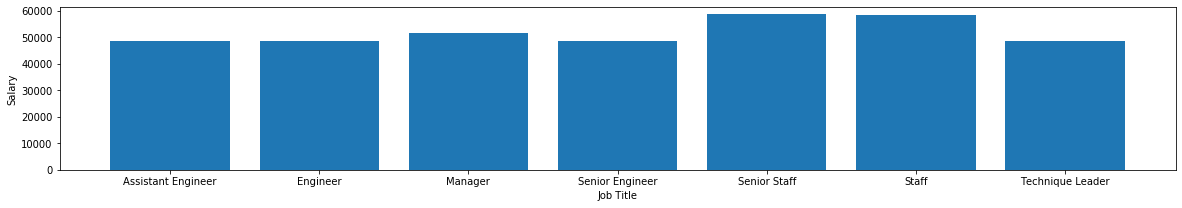

In [44]:
# CELL 12
# Plot salary data as a bar chart
# Sourced from activity 5.2.2
# QUESTION:  Is this the right way to show a histogram?

# DEBUG!! --'DataFrameGroupBy' object has no attribute 'index'
# QUESTION -- what does arange do?
# Set x axis and tick locations
x_axis = np.arange(len(salary_grouping2["title"].values))
print(x_axis)
#x_axis = salary_grouping.index
# tick_locations = [value for value in x_axis]

# Commented out x_labels - not used
#x_labels = salary_grouping

# labels sourced from https://benalexkeen.com/bar-charts-in-matplotlib/#:~:text=Bar%20charts%20are%20used%20to,xticks()%20

x_pos = x_axis


# DEBUG!! --Fix once column headers are fixed
# QUESTION -- are headers okay?
y_axis = salary_grouping2["salary"].values
print(y_axis)

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x = x_axis, height = y_axis) #color='r', alpha=0.5
#plt.xticks(tick_locations, salary_data["Salary Bin"], rotation="vertical")
#plt.show()
plt.xlabel("Job Title")
plt.ylabel("Salary")

# DEBUG --
plt.xticks(x_pos, salary_grouping2["title"].values)